In [0]:
# this is used for google drive training 
# add google dirve folder
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/training1")
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


'/content/drive/My Drive/training1'

In [0]:
# import os
# import sys
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# fileDir = os.getcwd()
# sys.path.append(fileDir)

# import tensorflow as tf
# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")

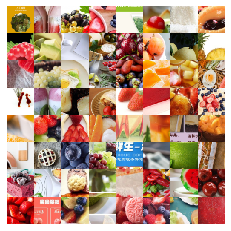

In [0]:
from utils import save_images, show_images, init_result
import matplotlib.pyplot as plt
import numpy as np
from GAN import GAN

#process_image_name = ["fruit_image.npy", "graffiti_image.npy", "metal_image.npy" ]
PROCESS_FOLDER = os.path.join(os.getcwd(), 'process_data/')
training_data = np.load(PROCESS_FOLDER+'fruit_image.npy')

# show some image
image_path = os.path.join(os.getcwd(), 'process_data/')+"fruit_sample.png"
sample = training_data[:64]
save_images(sample, [8, 8], image_path)
show_images(image_path)

In [0]:
# creata folder to save training data
init_result()

In [0]:
gan = GAN(input_dim = (64,64,3) , 
          discriminator_dense = [528, 256, 128, 64], 
          discriminator_learning_rate = 0.001, 
          generator_dense = [ 64, 128, 258, 528] , 
          generator_learning_rate = 0.001, 
          optimiser = 'adam', z_dim = 100 )
gan.discriminator.summary()
gan.generator.summary()

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 64, 64, 3)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_181 (Dense)            (None, 528)               6488592   
_________________________________________________________________
dense_182 (Dense)            (None, 256)               135424    
_________________________________________________________________
dense_183 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_184 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 65 

In [0]:
#OBJECTS = ["fruit", "graffiti", "metal"]
mode = "build"

GAN_FOLDER = os.path.join(os.getcwd(), 'Result/GAN')
PATH_MODEL = os.path.join(GAN_FOLDER, "metal")
if mode == 'build':
    gan.save(PATH_MODEL)
else:
    gan.load_weights(os.path.join(PATH_MODEL, 'weights/weights.h5'))

Epoch: %d  2000
Discriminator loss: (%.3f)(Real %.3f, Fake %.3f) 0.05767291784286499 1.1920933e-07 0.11534572
Discriminator accuracy: (%.3f)(Real %.3f,Fake %.3f) 1.0 1.0 1.0
Generator loss: %.3f,  Generator accuracy: %.3f] 2.2174506 0.0


Current epoch: 0,  time since start: 6.1 sec


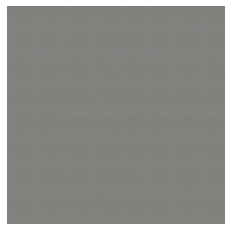

Epoch: %d  2100
Discriminator loss: (%.3f)(Real %.3f, Fake %.3f) 0.053186383098363876 1.1920933e-07 0.10637265
Discriminator accuracy: (%.3f)(Real %.3f,Fake %.3f) 1.0 1.0 1.0
Generator loss: %.3f,  Generator accuracy: %.3f] 2.2940316 0.0


Current epoch: 100,  time since start: 14.2 sec


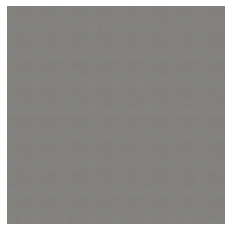

Epoch: %d  2200
Discriminator loss: (%.3f)(Real %.3f, Fake %.3f) 0.0490780808031559 1.1920933e-07 0.09815604
Discriminator accuracy: (%.3f)(Real %.3f,Fake %.3f) 1.0 1.0 1.0
Generator loss: %.3f,  Generator accuracy: %.3f] 2.3703814 0.0


Current epoch: 200,  time since start: 25.9 sec


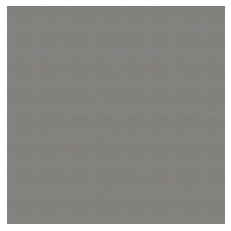

Epoch: %d  2300
Discriminator loss: (%.3f)(Real %.3f, Fake %.3f) 0.04531330242753029 2.5399052e-06 0.090624064
Discriminator accuracy: (%.3f)(Real %.3f,Fake %.3f) 1.0 1.0 1.0
Generator loss: %.3f,  Generator accuracy: %.3f] 2.4465122 0.0


In [0]:
BATCH_SIZE = 64
EPOCHS = 1000
PRINT_EVERY_N_BATCHES = 100

gan.train(
    training_data
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = PATH_MODEL
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

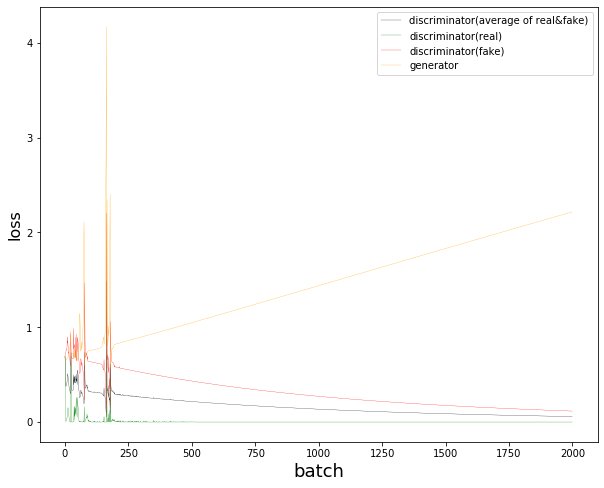

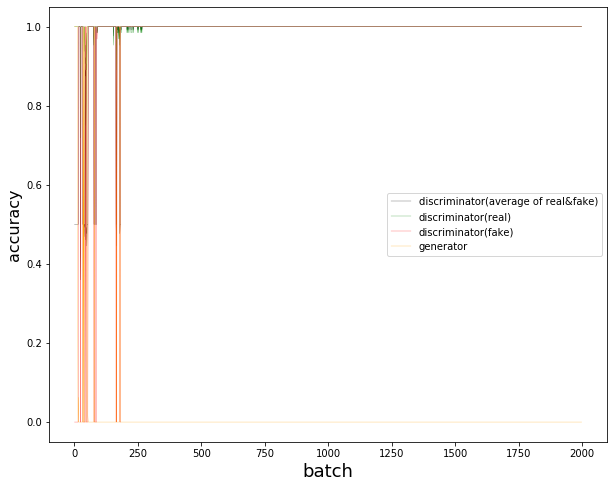

In [0]:
fig = plt.figure(figsize=(10, 8))
plt.plot([x[0] for x in gan.d_losses], color='black', label = "discriminator(average of real&fake)", linewidth=0.25)
plt.plot([x[1] for x in gan.d_losses], color='green', label = "discriminator(real)", linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', label = "discriminator(fake)", linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange',label = "generator", linewidth=0.25)
plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)
plt.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
plt.plot([x[3] for x in gan.d_losses], color='black', label = "discriminator(average of real&fake)", linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green',label = "discriminator(real)",  linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red',label = "discriminator(fake)", linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange',label = "generator", linewidth=0.25)
plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)
plt.legend()
plt.show()

In [0]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, dcgan.z_dim))
gen_imgs = dcgan.generator.predict(noise)

gen_imgs_path = os.path.join(PATH_MODEL, 'gen_samples.png')
save_images(gen_imgs, [r, c], gen_imgs_path)
show_images(gen_imgs_path)

def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

cnt = 0
sml_imgs = []
for i in range( r * c):
  c_diff = 10
  c_img = None
  for k_idx, k in enumerate(training_data):
      diff = compare_images(gen_imgs[i, :,:,:], k)
      if diff < c_diff:
          c_img = np.copy(k)
          c_diff = diff
  sml_imgs.append( c_img)
sml_imgs = np.array(sml_imgs)

sml_imgs_path = os.path.join(PATH_MODEL, 'gen_samples_closest.png')
save_images(sml_imgs, [r, c], sml_imgs_path)
show_images(sml_imgs_path)